In [1]:
import sys
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import subtle.subtle_io as suio
import subtle.subtle_preprocess as sup
import subtle.subtle_plot as suplot
import nibabel as nib
sys.path.insert(0, '/home/subtle/jon/tools/SimpleElastix/build/SimpleITK-build/Wrapping/Python/Packaging/build/lib.linux-x86_64-3.5/SimpleITK')
import SimpleITK as sitk

from scipy.ndimage import zoom

Using TensorFlow backend.
/home/subtle/tensorflow/lib/python3.5/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
data_t = suio.load_file('/raid/jon/data_full_tiantan/data/Brain2H-600441599.h5')
data_s = suio.load_file('/raid/jon/data_full_stanford/data/Patient_0485.h5')
print(data_s.shape)
print(data_t.shape)

(384, 3, 512, 512)
(196, 3, 240, 240)


In [11]:
# data_t_zoom = zoom(data_t, np.array(data_s.shape)/np.array(data_t.shape))
data_t_zoom_0 = zoom(data_t[:,0,:,:].squeeze(), zoom=(1,512/240,512/240), order=3)
data_t_zoom_1 = zoom(data_t[:,1,:,:].squeeze(), zoom=(1,512/240,512/240), order=3)
data_t_zoom_2 = zoom(data_t[:,2,:,:].squeeze(), zoom=(1,512/240,512/240), order=3)
data_t_zoom = np.stack((data_t_zoom_0[:,None,:,:], data_t_zoom_1[:,None,:,:], data_t_zoom_2[:,None,:,:]), axis=1)
print(data_t_zoom.shape)



(196, 3, 1, 512, 512)


In [15]:
data_t_metadata = suio.load_h5_metadata('/raid/jon/data_full_tiantan/data/Brain2H-600441599.h5')

In [17]:
suio.save_data_h5('/raid/jon/data_full_tiantan/data/Brain2H-600441599_zoom.h5', data_t_zoom.squeeze(), metadata=data_t_metadata)

0

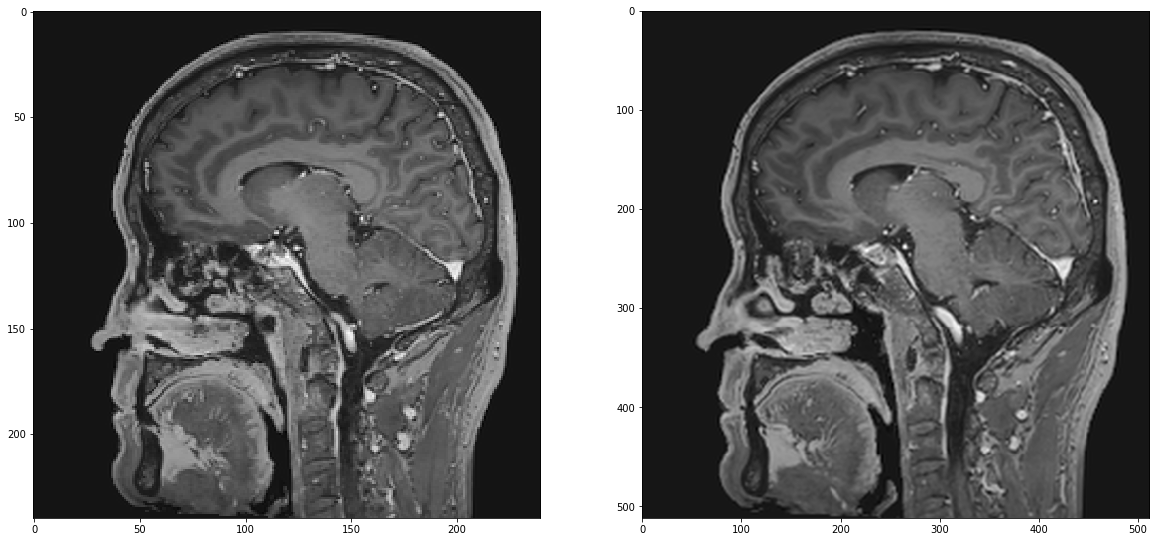

In [10]:
idx=180
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(data_t[idx//2,2,...].squeeze(), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(data_t_zoom[idx,2,...].squeeze(), cmap='gray')

In [ ]:
idx = 50
plt.figure(figsize=(16,10))
suplot.imshowtile(np.squeeze(data[idx,...]).transpose((1,2,0)), cmap='gray')

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.imshow((np.squeeze(data[idx,1,...]-data[idx,0,...])), cmap='gray')
plt.subplot(1,2,2)
plt.imshow((np.squeeze(data[idx,2,...]-data[idx,0,...])), cmap='gray')


In [31]:
data = suio.load_file('/raid/jon/data_full_tiantan/data/Brain2H-600441599_zoom.h5')
data_predict = suio.load_file('/raid/jon/predictions/data_predict_0265f4.npy').squeeze()
print(data_predict.shape)
data2 = np.concatenate((data, data_predict[:,None,:,:]), axis=1)
print(data2.shape)

idx = 60
plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(data[idx,2,...]), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(data_predict[idx,...]), cmap='gray')
plt.figure(figsize=(20,16))
suplot.imshowtile(np.squeeze(data2[idx,...]).transpose((1,2,0)), cmap='gray')

(196, 240, 240)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

(196, 3, 240, 240)
(196, 240, 240)
(196, 4, 240, 240)


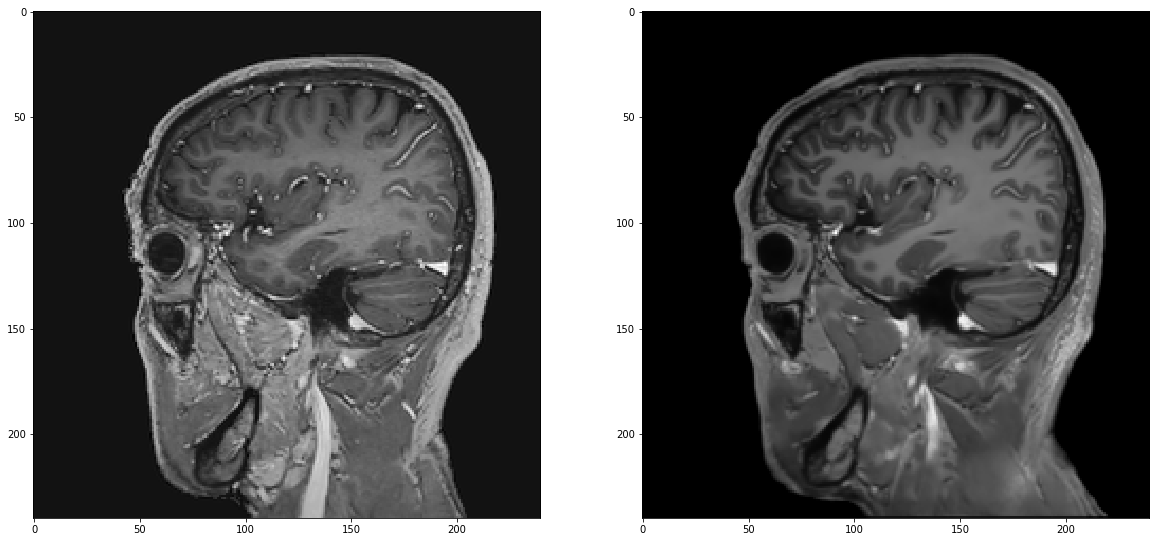

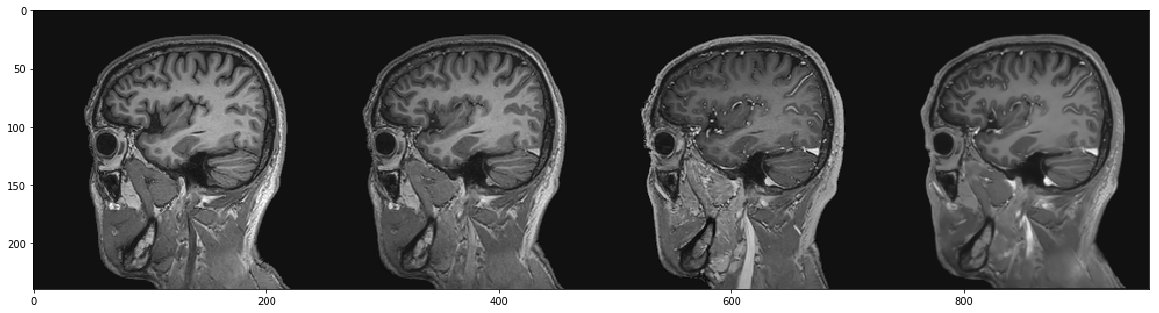

In [32]:
data = suio.load_file('/raid/jon/data_full_tiantan/data/Brain2H-600441599.h5')
data_predict = suio.load_file('/raid/jon/predictions/data_predict_0265f4.npy').squeeze()
print(data.shape)
print(data_predict.shape)
data2 = np.concatenate((data, data_predict[:,None,:,:]), axis=1)
print(data2.shape)

idx = 60
plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(np.squeeze(data[idx,2,...]), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(data_predict[idx,...]), cmap='gray')
plt.figure(figsize=(20,16))
suplot.imshowtile(np.squeeze(data2[idx,...]).transpose((1,2,0)), cmap='gray')

In [34]:
print(data_s.shape)
data_s2 = data_s.copy()
data_s2[:,1,:,:] = data_s[:,0,:,:]
data_s_metadata = suio.load_h5_metadata('/raid/jon/data_full_stanford/data/Patient_0485.h5')
suio.save_data_h5('/raid/jon/data_full_stanford/data/Patient_0485_nocon.h5', data_s2.squeeze(), metadata=data_s_metadata)

(384, 3, 512, 512)


0